# US visa application analysis

## Section 1 -- Data cleaning

In [1]:
# read the csv file using pandas
# read the csv file using pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
%matplotlib inline

data = pd.read_csv("/Users/marjan/Desktop/us_perm_visas.csv")
data

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000,NaN,yr,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PERM,A-07352-06288,NaN,NaN,Denied,EWI,...,NaN,NaN,NaN,Other Economic Sector,37024,NaN,yr,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,PERM,A-07354-06926,NaN,NaN,Certified-Expired,H-1B,...,NaN,NaN,NaN,Educational Services,47084,52000,yr,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,PERM,A-08004-10147,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Advanced Mfg,36733,NaN,yr,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,PERM,A-08004-10184,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,IT,44824,85000,yr,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,PERM,A-08010-11785,NaN,NaN,Denied,E-2,...,NaN,NaN,NaN,Retail,12.86,16.82,hr,NaN,NaN,NaN


In [2]:
# original data size
# rows: 374362
# columns: 154
data.shape

(374362, 154)

# 1.2. Data cleaning for ratio of acceptance in different countries:
Since in some countries, there is a small number of visa applicants, it does not give us an informative data,so we need to set a threshold and disregard cases with small amount of applicants, while cleaning the data.

In [3]:
#First clean the data based on column of 'country_of_citizenship'.
#We set the threshold to countries with 3000 applicants or more.
#There are 10 countries we'll work in clean_data

data_clean=data[['country_of_citizenship','case_status']] #here we just needs columns containing country of citizenship and their status.
data_clean=data_clean.dropna(subset=['country_of_citizenship','case_status']) #clean data from Nan vaiables.
data_clean['country_of_citizenship'].tolist()


top_countries=data_clean.country_of_citizenship.value_counts()

list_top_countries=top_countries.index.values.tolist()[:10] #choose top 10 countries

data_clean['country_of_citizenship']=data_clean['country_of_citizenship'].where(data_clean['country_of_citizenship'].isin(list_top_countries))
data_clean=data_clean.dropna(subset=['country_of_citizenship'])
data_clean

,country_of_citizenship,case_status
20578,INDIA,Certified
20579,PHILIPPINES,Certified
20580,INDIA,Certified-Expired
20581,INDIA,Certified
20582,INDIA,Certified
20583,INDIA,Certified-Expired
20585,INDIA,Certified-Expired
20586,SOUTH KOREA,Certified-Expired
20587,INDIA,Certified-Expired
20588,PHILIPPINES,Certified-Expired


# 2. Find Acceptance ratio:

Here we include Certified and Certifies_expired in one category and disregard withdrawn case status.

In [5]:

data_clean = data_clean[data_clean["case_status"] != "Withdrawn"] #removing withdrawn in case status
data_clean.loc[data_clean.case_status == 'Certified-Expired', 'case_status'] = 'Certified' #adding Certified expired to certified case status.
data_clean


,country_of_citizenship,case_status
20578,INDIA,Certified
20579,PHILIPPINES,Certified
20580,INDIA,Certified
20581,INDIA,Certified
20582,INDIA,Certified
20583,INDIA,Certified
20585,INDIA,Certified
20586,SOUTH KOREA,Certified
20587,INDIA,Certified
20588,PHILIPPINES,Certified


# 2.1. Find Ratio of accepted and denied visas for individual countries.

In [6]:
total_ratio=[] #Each time, in the following for loop, we consider one country among top 10 countries
#and find if they had been accepted or denied, then devide the value by total number of applicants in that specific
#country. This way we find the acceptance and denied ratio for each country.
for i in range(len((data_clean.country_of_citizenship.value_counts()))):
    data_ratio=np.array([data_clean.country_of_citizenship.value_counts().index[i],(data_clean[np.logical_and(data_clean['country_of_citizenship']==data_clean.country_of_citizenship.value_counts().index[i],data_clean['case_status']=='Certified')].shape[0]/float(data_clean.country_of_citizenship.value_counts()[i]))*100,(data_clean[np.logical_and(data_clean['country_of_citizenship']==data_clean.country_of_citizenship.value_counts().index[i],data_clean['case_status']=='Denied')].shape[0]/float(data_clean.country_of_citizenship.value_counts()[i]))*100])
    total_ratio.append(data_ratio)
    
total_ratio = np.array(total_ratio)
total_ratio

array([['INDIA', '95.4244901674', '4.57550983258'],
       ['CHINA', '94.3712620183', '5.62873798168'],
       ['SOUTH KOREA', '88.7736827222', '11.2263172778'],
       ['CANADA', '93.8685353035', '6.13146469647'],
       ['MEXICO', '77.5546292788', '22.4453707212'],
       ['PHILIPPINES', '81.8169672679', '18.1830327321'],
       ['UNITED KINGDOM', '91.8441323063', '8.1558676937'],
       ['TAIWAN', '93.9024390244', '6.09756097561'],
       ['PAKISTAN', '91.2175648703', '8.78243512974'],
       ['FRANCE', '94.566353187', '5.43364681296']], dtype='|S14')

# 2.2. Create data frame:
Make a data frame with 3 columns of top 10 counties with accepted and denied visa ratio.

In [7]:
import pandas as pd
df = pd.DataFrame(total_ratio,columns=['country','accepted_ratio','denied_ratio'])

Sort ratio in descending order.

In [8]:
df['accepted_ratio'] = pd.to_numeric(df['accepted_ratio'], errors = "coerce")
df['denied_ratio'] = pd.to_numeric(df['denied_ratio'], errors = "coerce")
#df = df.sort_values(by=["accepted_ratio"], ascending=False) #With 95.42 percent,India has the most number of acceptance ratio
#df = df.sort_values(by=["denied_ratio"], ascending=False) #With 22.44 percent,Mexico has the most denied ratio between top 10 countries.

In [9]:
df

,country,accepted_ratio,denied_ratio
0,INDIA,95.424490,4.575510
1,CHINA,94.371262,5.628738
2,SOUTH KOREA,88.773683,11.226317
3,CANADA,93.868535,6.131465
4,MEXICO,77.554629,22.445371
5,PHILIPPINES,81.816967,18.183033
6,UNITED KINGDOM,91.844132,8.155868
7,TAIWAN,93.902439,6.097561
8,PAKISTAN,91.217565,8.782435
9,FRANCE,94.566353,5.433647


# 3. Visualizing:

# 3.1. Plotting accepted and denied ratio of countries:

Text(0,0.5,u'denied_ratio')

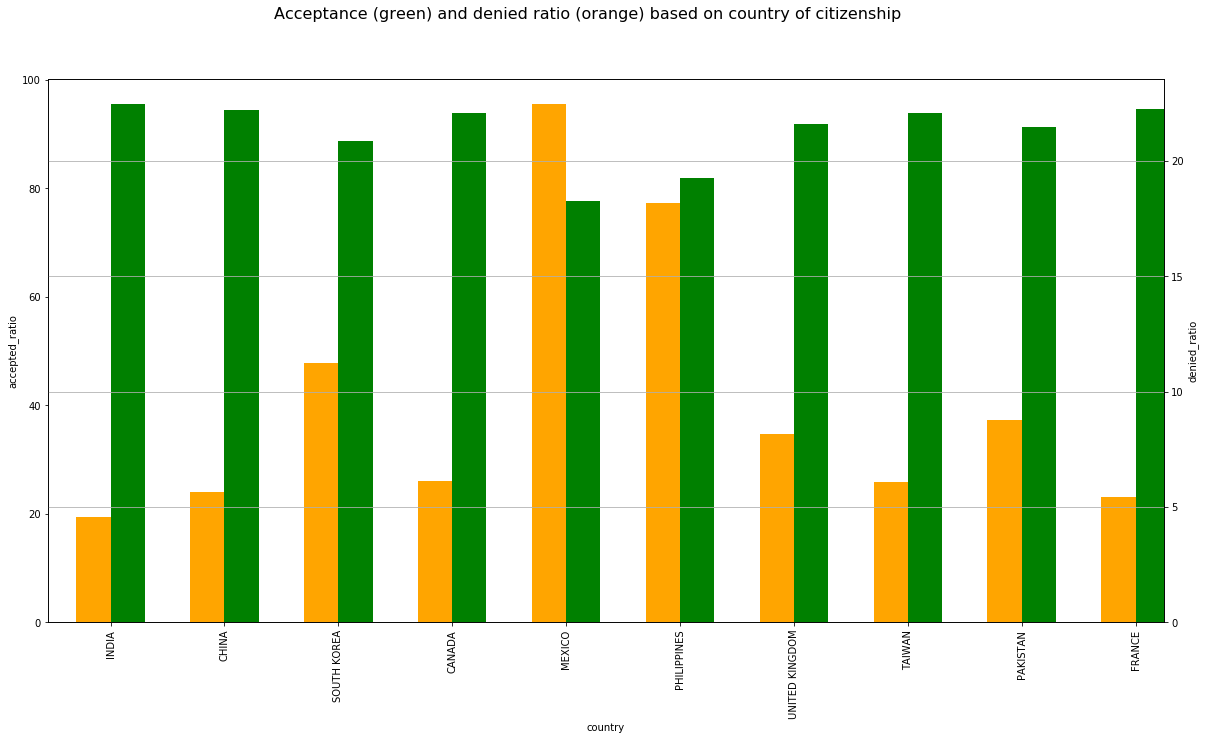

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#df = df.set_index('country')
fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

df.accepted_ratio.plot(kind='bar',color='green',ax=ax,width=width, position=0,label='accepted ratio')
df.denied_ratio.plot(kind='bar',color='orange', ax=ax2,width = width,position=1,label='denied ratio')
ax.grid(None, axis=1)
ax2.grid(None)

plt.suptitle('Acceptance (green) and denied ratio (orange) based on country of citizenship',size=16)
#plt.legend();
ax.set_ylabel('accepted_ratio')
ax2.set_ylabel('denied_ratio')

 # 3.2. Visualizing countries using WordCloud: 

In [ ]:
plt.subplots(figsize=(10,8))
d = path.dirname('/Users/marjan/Desktop/') #we give the direction of the picture which is used as a mask
text = " ".join(data["country_of_citizenship"].dropna().tolist()) #drop nan values of column country of citizenship, and change it to list.
us_mask = np.array(Image.open(path.join(d, "us-map-silhouette-vector.jpg"))) #change the mask to numpy array
wordcloud = WordCloud(background_color="white",mask=us_mask).generate(text) #generate text in mask
plt.imshow(wordcloud, interpolation='bilinear') #show final figure as image
plt.axis("off")
plt.show()

# 3.3  Visualizing jobs using WordCloud

In [ ]:
plt.subplots(figsize=(10,8)) #Here we did the same thing as previous example, but in this part foreign_worker_info_major
#has been visualized.
d = path.dirname('/Users/marjan/Desktop/')
text = " ".join(data["foreign_worker_info_major"].dropna().tolist())
job_mask = np.array(Image.open(path.join(d, "jobs.jpg")))
wordcloud = WordCloud(background_color="white",mask=job_mask).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Analysis for countries based on plot 3.1:


First we had 193 countries with various number of visa applicants. Some countries had large number of visa applicants, like india with 186777 people, while some countries,like Qatar, had only 1 visa applicant. 
We decided to make a threshold and consider countries with 3000 applicants or more, which ended up in having 10 countries with most number of visa applicants.

In figure above, we consider acceptance and denied ratio of top 10 countries mentioned.
As you can see with 95.42 percent,India has the most number of acceptance ratio, while Mexico has the most denied ratio with 22.44 percent between top 10 countries.
